In [9]:
import glob
import os
import math
import numpy as np
import pandas as pd
import scipy.signal
import scipy.special
import skimage
import skimage.io
import emcee
import bebi103

import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)
%matplotlib inline
# Import Bokeh modules for interactive plotting
import bokeh
bokeh.io.output_notebook()
# Load in TIFF stack
fname = '../data/goehring_FRAP_data/PH_138_A.tif'
ic = skimage.io.ImageCollection(fname, conserve_memory=False)
# Now, let's perform some exploratory data analysis on the FRAP images. We'll plot a few images to get a feel for the ROI:
# How long is it?
print('There are {0:d} frames.'.format(len(ic)))

# The directory containing daytime data
data_dir = '../data/goehring_FRAP_data'

# Glob string for images
im_glob = os.path.join(data_dir, '*.TIF')

# Get list of files in directory
im_list = glob.glob(im_glob)

Loading BokehJS ...

There are 149 frames.


In [10]:
im_list

['../data/goehring_FRAP_data\\PH_138_A.tif',
 '../data/goehring_FRAP_data\\PH_138_B.tif',
 '../data/goehring_FRAP_data\\PH_138_C.tif',
 '../data/goehring_FRAP_data\\PH_138_D.tif',
 '../data/goehring_FRAP_data\\PH_138_E.tif',
 '../data/goehring_FRAP_data\\PH_138_F.tif',
 '../data/goehring_FRAP_data\\PH_138_G.tif',
 '../data/goehring_FRAP_data\\PH_138_H.tif']

In [11]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
print(len(ic))
print(ic[20].shape)
#test = ic[20]/numpy.max()
#skimage.io.imshow(ic[20]) #+ 0 * 149]) # The shape of the bleaching is very clear starting from the 21st frame. (?)
verts = [(16.991726866271648, 9.4876724371770536), (65.043057562209043, 10.481837899851612), (63.717503611976291, 58.201780108230835), (15.334784428480702, 55.21928372020713)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
print(verts)

1192
(128, 128)
[(16.991726866271648, 9.487672437177054), (65.04305756220904, 10.481837899851612), (63.71750361197629, 58.201780108230835), (15.334784428480702, 55.21928372020713)]


In [12]:
fps = 1 / 0.188 
t = np.arange(0, len(ic)) / fps

# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

lists = []
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    lists.append(ic[20 + 149 * (i - 1) : 149 * i - 1])

new_t = np.arange(0, len(lists[0])) / fps
#for series in range(8):
    # Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()
    #for i in range(len(lists[series])):
        #total_int[i] = lists[series][roi_box].sum()

     
        
#plt.close()    
#plt.figure()    
#plt.plot(t, total_int)
#plt.plot(new_t, lists[0])
#plt.xlabel('time (s)')
#plt.ylabel('total intensity')
#plt.margins(0.02)    

C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


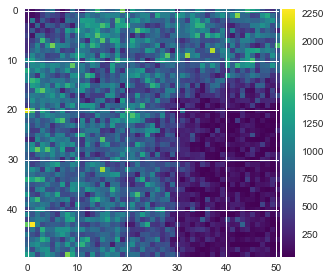

In [13]:
skimage.io.imshow(ic[20 + 149 * 1][roi_bbox])

In [14]:
len(lists[0])

128

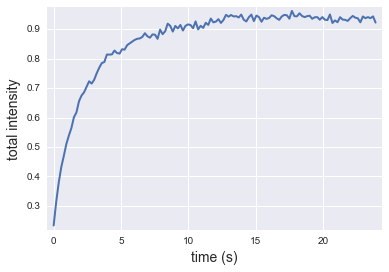

In [15]:
new_total_int = total_int[20:148] 
norm_total_int = new_total_int / total_int[19]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Mean normalized fluorescence for the first stack as a function of time is given above. Now, let's draw similar plots for the other seven stacks:

Stack 2:

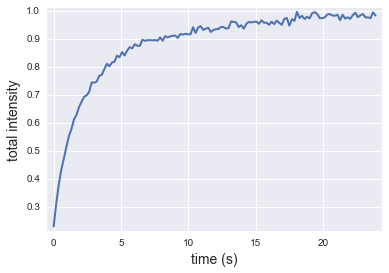

In [16]:
verts = [(46.485302258950462, 26.388485302644682), (90.5599711041896, 24.731542864853751), (93.21107900465509, 72.782873560791145), (48.142244696741407, 72.782873560791145)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 1 : 148 + 149 * 1] 
norm_total_int = new_total_int / total_int[19 + 149 * 1]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Stack 3: 

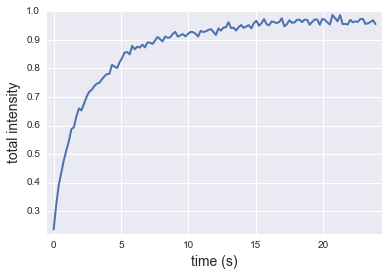

In [17]:
verts = [(48.805021671857794, 13.795722775433504), (95.530798417562409, 13.795722775433504), (98.181906318027927, 60.190111033579967), (52.450295034997872, 62.509830446487285)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 2 : 148 + 149 * 2] 
norm_total_int = new_total_int / total_int[19 + 149 * 2]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Stack 4: 

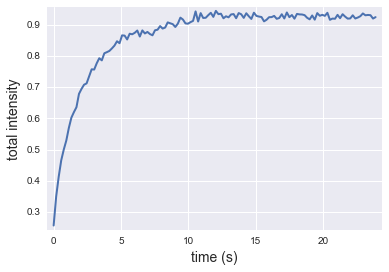

In [18]:
verts = [(59.409453273719841, 47.928736993926975), (105.47245304430808, 47.928736993926975), (106.13523001942445, 96.642844664980757), (59.409453273719841, 94.654513739631625)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 3 : 148 + 149 * 3] 
norm_total_int = new_total_int / total_int[19 + 149 * 3]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Stack 5:

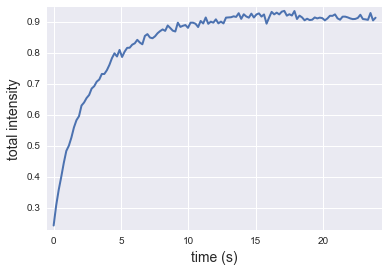

In [19]:
verts = [(19.974223254295346, 57.870391620672649), (70.34527336314008, 58.201780108230835), (71.008050338256453, 104.5961683663773), (20.637000229411726, 104.5961683663773)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 4 : 148 + 149 * 4] 
norm_total_int = new_total_int / total_int[19 + 149 * 4]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Stack 6:

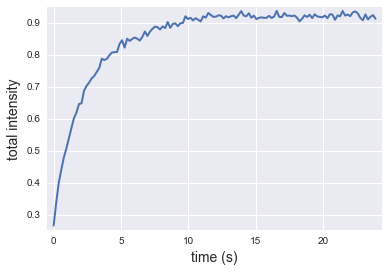

In [20]:
verts = [(17.323115353829834, 53.893729769974371), (65.043057562209043, 52.899564307299812), (66.368611512441788, 101.61367197835359), (16.660338378713462, 103.60200290370273)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 5 : 148 + 149 * 5] 
norm_total_int = new_total_int / total_int[19 + 149 * 5]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Stack 7:

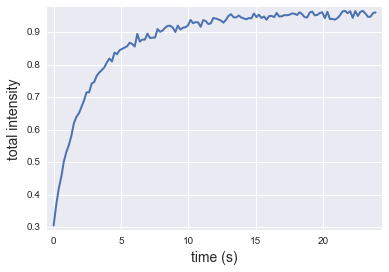

In [21]:
verts = [(17.985892328946214, 57.870391620672649), (66.037223024883616, 57.539003133114448), (65.374446049767243, 105.92172231661004), (19.974223254295346, 105.59033382905186)]
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 6 : 148 + 149 * 6] 
norm_total_int = new_total_int / total_int[19 + 149 * 6]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

Stack 8:

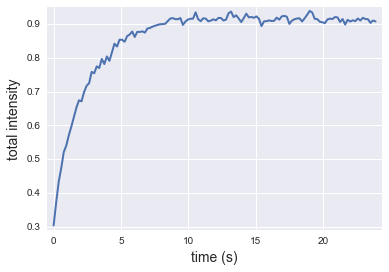

In [22]:
verts = [(24.945050567668183, 55.550672207765317), (70.01388487558188, 53.562341282416185), (72.333604288489198, 100.95089500323721), (26.270604517900942, 103.60200290370273)]
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 7 : 148 + 149 * 7] 
norm_total_int = new_total_int / total_int[19 + 149 * 7]
plt.plot(new_t, norm_total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)  

<div class="alert alert-info">Good, however, in the future you should functionalize the code; so that you have a function to normlaize the intensities and then you can just run a for loop and call that funciton and plot the data. This eliminates the need for redundant code. Score: 15/15</div>

Part (b): Now, let's work on performing regressions to find $D$ and $k_{off}$. We first get rough estimates on $D$ and $k_{off}$:

To find d_x and d_y for the first set, we need the size of the ROI:

In [23]:
verts = [(16.991726866271648, 9.4876724371770536), (65.043057562209043, 10.481837899851612), (63.717503611976291, 58.201780108230835), (15.334784428480702, 55.21928372020713)]
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)
total_int = np.empty(len(t))
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_bbox].sum()

new_total_int = total_int[20 + 149 * 0 : 148 + 149 * 0] 
norm_total_int = new_total_int / total_int[19 + 149 * 0]


In [ ]:
roi_bbox

(slice(10, 60, None), slice(16, 67, None))

Looking at roi_bbox, we find that d_x = 50 and d_y = 51. 

In [ ]:
def theoretical_intensity(p, t, d_x, d_y):
    """
    Theoretical model for normalized intensity
    """
    d, k_off, f_f, f_b = p

    return f_f * (1 - f_b * (4 * np.exp(-k_off * t) / (d_x * d_y)) * phi_x(d_x, d, t) * phi_y(d_y, d, t))

def phi_x(d_x, d, t):
    return d_x / 2 * scipy.special.erf(d_x / np.sqrt(4 * d * t)) - np.sqrt(d * t / math.pi) * (1 - np.exp(-d_x ** 2 / (4 * d * t)))
    
def phi_y(d_y, d, t):
    return d_y / 2 * scipy.special.erf(d_y / np.sqrt(4 * d * t)) - np.sqrt(d * t / math.pi) * (1 - np.exp(-d_y ** 2 / (4 * d * t)))    


def log_post(p, t, norm_total_int, d_x, d_y):

    # Unpack parameters
    d, k_off, f_f, f_b = p
    
    int_theor = theoretical_intensity(p, t, d_x, d_y)
    return -len(t) / 2 * np.log(np.sum((norm_total_int - int_theor)**2))

n_dim = 4        # number of parameters in the model (r and p)
n_walkers = 50   # number of MCMC walkers
n_burn = 100    # "burn-in" period to let chains stabilize
n_steps = 100   # number of MCMC steps to take after burn-in
np.random.seed(42)
# p0[i,j] is the starting point for walk i along variable j.
p0 = np.empty((n_walkers, n_dim))
p0[:,0] = np.random.uniform(0, 1, n_walkers)      
p0[:,1] = np.random.uniform(0, 0.1, n_walkers)       
p0[:,2] =  np.random.uniform(0, 1, n_walkers) 
p0[:,3] =  np.random.uniform(0, 1, n_walkers) 

sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_post, 
                                args=(new_t, norm_total_int, 50, 51), threads=2)
# Do burn-in
pos, prob, state = sampler.run_mcmc(p0, n_burn, storechain=False)
# Sample again, starting from end burn-in state
_ = sampler.run_mcmc(pos, n_steps)

In [ ]:
# Conver sampler output to DataFrame
df_mcmc = bebi103.sampler_to_dataframe(sampler, columns=['d', 'k_off', 'f_f', 'f_b'])

# Take a look
df_mcmc.head()

The four parameters can be estimated using the above code. 

<div class="alert alert-info">Please plot your results. I am not sure what happeneed here. Score: 0/25</div>

<div class="alert alert-info">Final Score: 15/40</div>